In [5]:
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

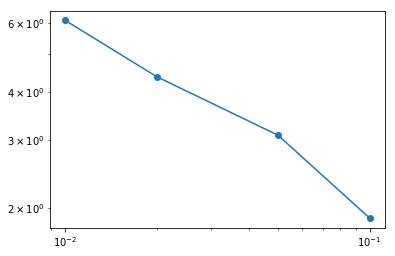

In [193]:
gap=np.array([100,200,500,1000])
Rref=0.930035685124
R=Rref/np.array([0.1523901796,0.212956615883,0.301343270898,0.493025613225])
plt.loglog(gap/10000,R,'o-')

QPC gap = 100.0 nm
J(GND) = 0.121292152519
J(SRC) = 0.121239793433
V(A) = 0.898982517283
V(B) = 0.101012978823
ΔV(A-B) = 0.79796953846
J(GND)/ΔV = 0.152000980831


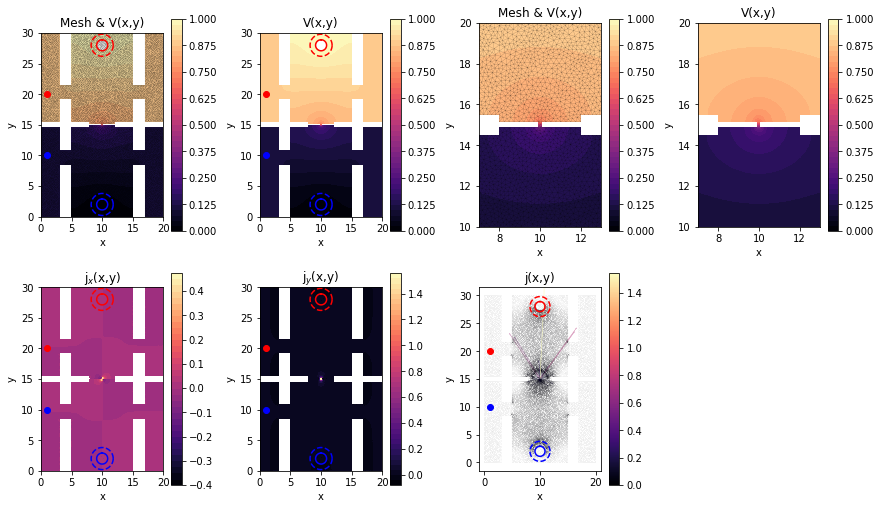

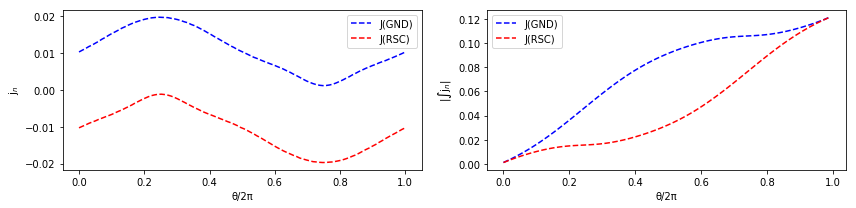

In [180]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=100
gap=0.1
print('QPC gap = '+str(gap*1000) +' nm')
V=run_solver(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


QPC gap = 200.0 nm
J(GND) = 0.156354362601
J(SRC) = 0.155491568176
V(A) = 0.867112458721
V(B) = 0.132904873987
ΔV(A-B) = 0.734207584734
J(GND)/ΔV = 0.212956615883


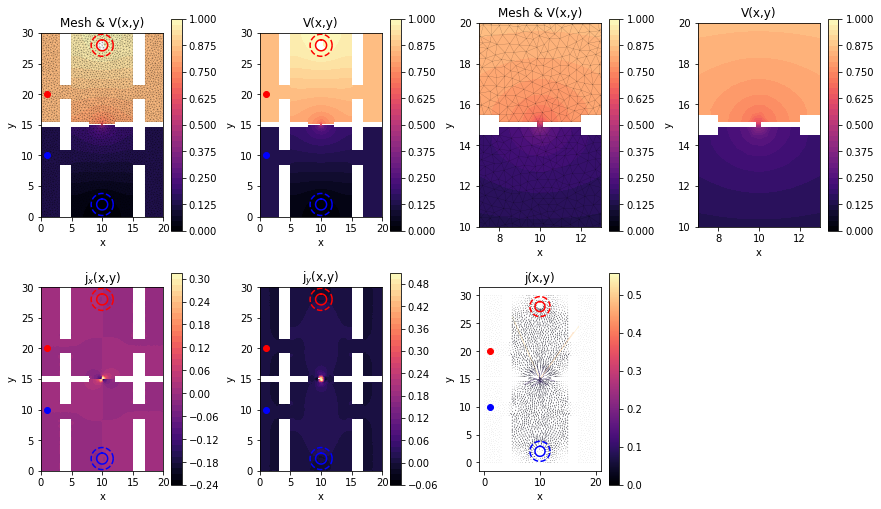

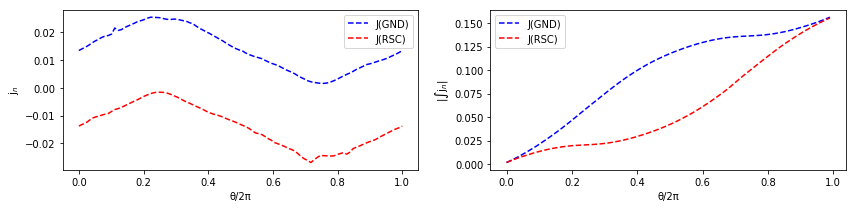

In [172]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=50
gap=0.2
print('QPC gap = '+str(gap*1000) +' nm')
V=run_solver(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


QPC gap = 500.0 nm
J(GND) = 0.199450700906
J(SRC) = 0.197897814956
V(A) = 0.830949063066
V(B) = 0.169076971772
ΔV(A-B) = 0.661872091294
J(GND)/ΔV = 0.301343270898


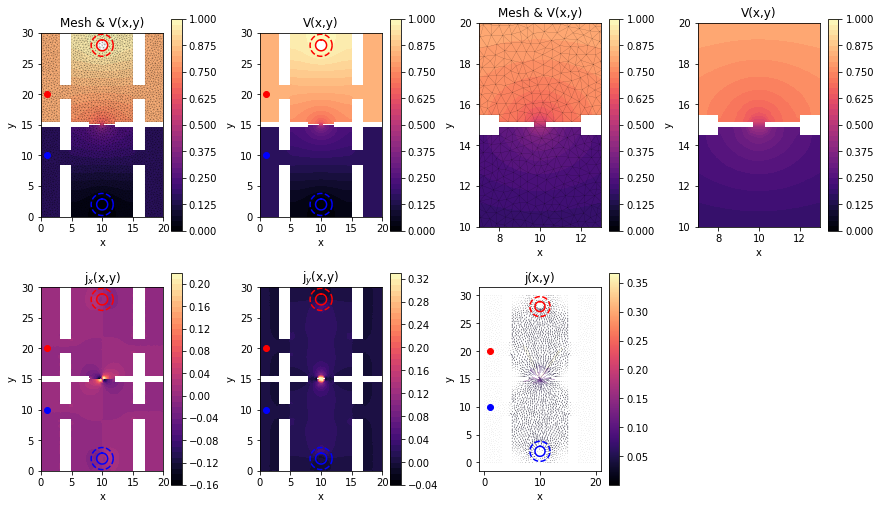

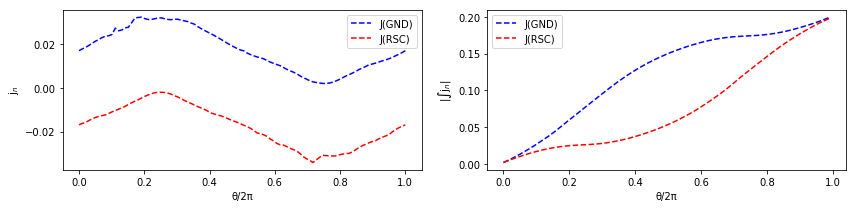

In [171]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=50
gap=0.5
print('QPC gap = '+str(gap*1000) +' nm')
V=run_solver(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


QPC gap = 1000 nm
J(GND) = 0.231871683353
J(SRC) = 0.230178936653
V(A) = 0.803226642567
V(B) = 0.196768716429
ΔV(A-B) = 0.606457926138
J(GND)/ΔV = 0.382337625347


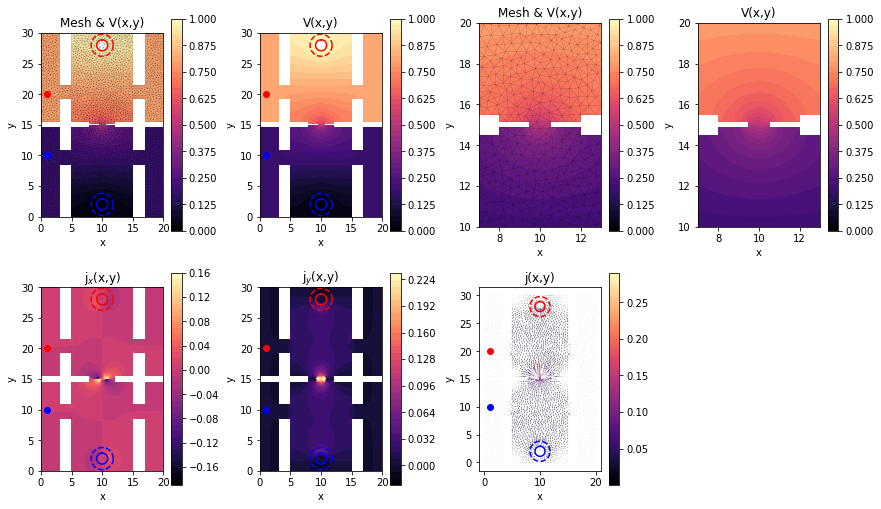

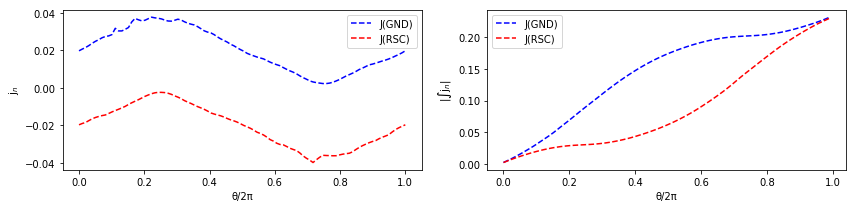

In [170]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=50
gap=1
print('QPC gap = '+str(gap*1000) +' nm')
V=run_solver(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


QPC gap = 2000 nm
J(GND) = 0.268772534542
J(SRC) = 0.268133009189
V(A) = 0.772571794763
V(B) = 0.227422562486
ΔV(A-B) = 0.545149232277
J(GND)/ΔV = 0.493025613225


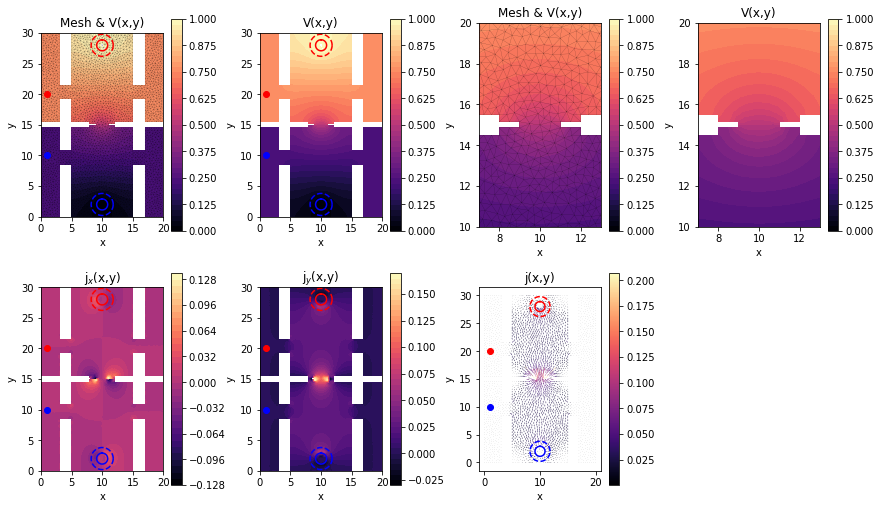

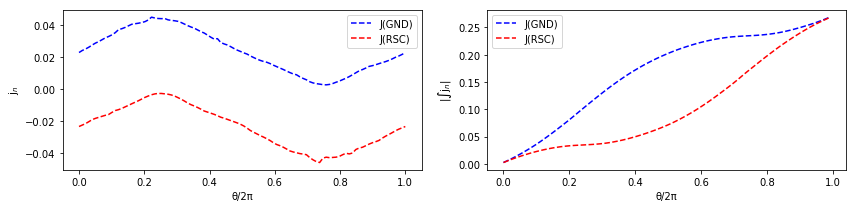

In [169]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=50
gap=2
print('QPC gap = '+str(gap*1000) +' nm')
V=run_solver(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


In [168]:
def solver(meshsize,r,xGND,yGND,xSRC,ySRC,L,W,gap):
    degree=2
    #geometry setup
    cen=[2.5,2.5]; 

    w=0.15
    qpc1u=Rectangle(Point(0,15-w),Point(10-gap/2,15+w))
    qpc1d=Rectangle(Point(10+gap/2,15-w),Point(20,15+w))

    w=0.5
    mesa2u=Rectangle(Point(0,15-w),Point(8,15+w))
    mesa2d=Rectangle(Point(12,15-w),Point(20,15+w))
    w=4.25
    mesa3u=Rectangle(Point(3,15-w),Point(5,15+w))
    mesa3d=Rectangle(Point(15,15-w),Point(17,15+w))
    
    w=4.25
    mesa4d=Rectangle(Point(3,0),Point(5,8.5))
    mesa4u=Rectangle(Point(15,0),Point(17,8.5))
    
    w=4.25
    mesa5d=Rectangle(Point(3,W),Point(5,W-8.5))
    mesa5u=Rectangle(Point(15,W),Point(17,W-8.5))
    
    mesa=qpc1u+qpc1d+mesa2u+mesa2d+mesa3u+mesa3d+mesa4d+mesa4u+mesa5d+mesa5u
    domain = Rectangle(Point(0, 0),Point(L, W))-mesa
    
    circ2 = Circle(Point(xGND,yGND), r)
    domain.set_subdomain(2, circ2)
    circ3 = Circle(Point(xSRC,ySRC), r)
    domain.set_subdomain(3, circ3)

    
    mesh = generate_mesh(domain, meshsize)   
    V = FunctionSpace(mesh, 'P', degree)

    def boundary(x, on_boundary):
        return on_boundary

    boundary_markers = MeshFunction('size_t', mesh, 2, mesh.domains())
    boundaries = MeshFunction('size_t', mesh, 1, mesh.domains())
    for f in facets(mesh):
        domains = []
        for c in cells(f):
            domains.append(boundary_markers[c])
        domains = list(set(domains))
        if len(domains) > 1:     
            boundaries[f]=np.max(domains)

    pad_bc2 = DirichletBC(V, Constant(0), boundaries, 2)
    pad_bc3 = DirichletBC(V, Constant(1), boundaries, 3)
    boundary_bc = DirichletBC(V, Constant(0), boundary)
    bc = [pad_bc2, pad_bc3]

    #variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    g = Constant('0')
    L = Constant('0') * v * dx - g*v*ds
        
    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)
    return u

def run_solver(meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap):
    V = solver(meshsize,r,xGND,yGND,xSRC,ySRC,L,W,gap)
    cen=[2.5,2.5];#clock center
    Npts=100; #number of points for 1D current interpolation path
    fr=2; # multiplication factor for radius of 1D current interpolation path
    padGND=[xGND,yGND];
    padSRC=[xSRC,ySRC];
    padA=[xA,yA];
    padB=[xB,yB];
    θ = np.linspace(0,2*np.pi,Npts); # θ = angle for the radial 1d current interpolation path
    xGND = np.array([padGND[0]+fr*r*np.cos(θ),padGND[1]+fr*r*np.sin(θ)])
    xSRC = np.array([padSRC[0]+fr*r*np.cos(θ),padSRC[1]+fr*r*np.sin(θ)])
    nGND = np.array([np.cos(θ),np.sin(θ)])
    
    plt.figure(figsize=[12,7])
    plt.subplot(2,4,1)
    plot(V.function_space().mesh(),color='k',linewidth=0.1)
    shrink=1
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('Mesh & V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    
    plt.subplot(2,4,2)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink)
    plt.title('V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');
    plt.tight_layout()
        
    plt.subplot(2,4,3)
    plot(V.function_space().mesh(),color='k',linewidth=0.1)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('Mesh & V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.ylim([10,20]);    plt.xlim([7,13])

    plt.subplot(2,4,4)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink)
    plt.title('V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.ylim([10,20]);    plt.xlim([7,13])
    
    plt.subplot(2,4,5);jx=project(V.dx(0))
    p=plot(jx,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j$_x$(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    plt.subplot(2,4,6);jy=project(V.dx(1))
    p=plot(jy,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j$_y$(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    plt.subplot(2,4,7);p=plot((grad(V)),cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');
    
    
    plt.figure(figsize=[12,3])

    plt.subplot(1,2,1)
    JGND = [np.dot(nGND[:,ii],[jx(xGND[:,ii]),jy(xGND[:,ii])]) for ii in range(0,Npts)]
    plt.plot(θ/2/np.pi,JGND,'b--');
    JSRC = [np.dot(nGND[:,ii],[jx(xSRC[:,ii]),jy(xSRC[:,ii])]) for ii in range(0,Npts)]
    plt.plot(θ/2/np.pi,JSRC,'r--');
    plt.xlabel('θ/2π');plt.ylabel('j$_n$');plt.legend(['J(GND)','J(RSC)'])
    
    plt.subplot(1,2,2)
    JnGND=np.abs(scipy.integrate.cumtrapz(JGND,θ*fr*r))
    plt.plot(θ[0:-1]/2/np.pi,JnGND,'b--');
    JnSRC=np.abs(scipy.integrate.cumtrapz(JSRC,θ*fr*r))
    plt.plot(θ[0:-1]/2/np.pi,JnSRC,'r--');
    plt.xlabel('θ/2π');plt.ylabel(r'|$\int$j$_n$|');plt.legend(['J(GND)','J(RSC)'])

    plt.tight_layout()
    IntJnGND=np.abs(np.max(JnGND)); IntJnSRC=np.abs(np.max(JnSRC));
    ΔV=V(padA)-V(padB);
    
    print('J(GND) = '+str(IntJnGND))
    print('J(SRC) = '+str(IntJnSRC))
    print('V(A) = '+str(V(padA)))
    print('V(B) = '+str(V(padB)))
    print('ΔV(A-B) = '+str(ΔV))
    print('J(GND)/ΔV = '+str(IntJnGND/ΔV))
    
    return V

no gap
J(GND) = 0.355843852216
J(SRC) = 0.357837994899
V(A) = 0.691319704149
V(B) = 0.308706587354
ΔV(A-B) = 0.382613116796
J(GND)/ΔV = 0.930035685124


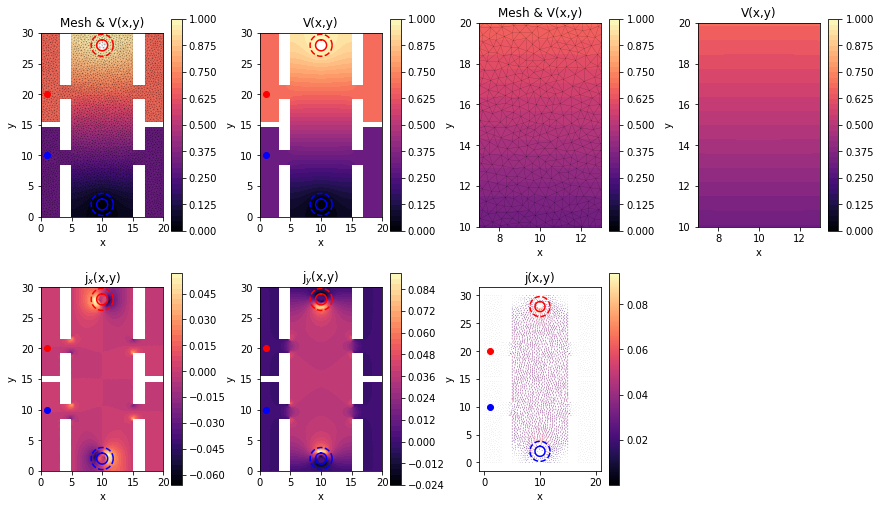

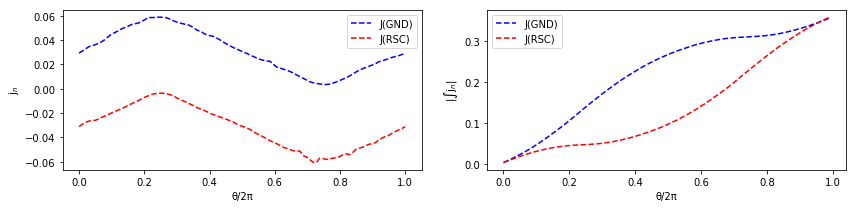

In [188]:
#STO32
L=20;W=30;
xGND=L/2;yGND=2;
xSRC=L/2;ySRC=W-2;
xA=1;yA=W-10;
xB=1;yB=0+10;
meshsize=50
gap=2
print('no gap')
V=run_solverref(meshsize,0.9, xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap) #args:meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W


In [187]:
def solverref(meshsize,r,xGND,yGND,xSRC,ySRC,L,W,gap):
    degree=2
    #geometry setup
    cen=[2.5,2.5]; 

#     w=0.15
#     qpc1u=Rectangle(Point(0,15-w),Point(10-gap/2,15+w))
#     qpc1d=Rectangle(Point(10+gap/2,15-w),Point(20,15+w))

    w=0.5
    mesa2u=Rectangle(Point(0,15-w),Point(4,15+w))
    mesa2d=Rectangle(Point(16,15-w),Point(20,15+w))
    w=4.25
    mesa3u=Rectangle(Point(3,15-w),Point(5,15+w))
    mesa3d=Rectangle(Point(15,15-w),Point(17,15+w))
    
    w=4.25
    mesa4d=Rectangle(Point(3,0),Point(5,8.5))
    mesa4u=Rectangle(Point(15,0),Point(17,8.5))
    
    w=4.25
    mesa5d=Rectangle(Point(3,W),Point(5,W-8.5))
    mesa5u=Rectangle(Point(15,W),Point(17,W-8.5))
    
    mesa=mesa2u+mesa2d+mesa3u+mesa3d+mesa4d+mesa4u+mesa5d+mesa5u
    domain = Rectangle(Point(0, 0),Point(L, W))-mesa
    
    circ2 = Circle(Point(xGND,yGND), r)
    domain.set_subdomain(2, circ2)
    circ3 = Circle(Point(xSRC,ySRC), r)
    domain.set_subdomain(3, circ3)

    
    mesh = generate_mesh(domain, meshsize)   
    V = FunctionSpace(mesh, 'P', degree)

    def boundary(x, on_boundary):
        return on_boundary

    boundary_markers = MeshFunction('size_t', mesh, 2, mesh.domains())
    boundaries = MeshFunction('size_t', mesh, 1, mesh.domains())
    for f in facets(mesh):
        domains = []
        for c in cells(f):
            domains.append(boundary_markers[c])
        domains = list(set(domains))
        if len(domains) > 1:     
            boundaries[f]=np.max(domains)

    pad_bc2 = DirichletBC(V, Constant(0), boundaries, 2)
    pad_bc3 = DirichletBC(V, Constant(1), boundaries, 3)
    boundary_bc = DirichletBC(V, Constant(0), boundary)
    bc = [pad_bc2, pad_bc3]

    #variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    a = dot(grad(u), grad(v))*dx
    g = Constant('0')
    L = Constant('0') * v * dx - g*v*ds
        
    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)
    return u

def run_solverref(meshsize,r,xGND,yGND,xSRC,ySRC,xA,yA,xB,yB,L,W,gap):
    V = solverref(meshsize,r,xGND,yGND,xSRC,ySRC,L,W,gap)
    cen=[2.5,2.5];#clock center
    Npts=100; #number of points for 1D current interpolation path
    fr=2; # multiplication factor for radius of 1D current interpolation path
    padGND=[xGND,yGND];
    padSRC=[xSRC,ySRC];
    padA=[xA,yA];
    padB=[xB,yB];
    θ = np.linspace(0,2*np.pi,Npts); # θ = angle for the radial 1d current interpolation path
    xGND = np.array([padGND[0]+fr*r*np.cos(θ),padGND[1]+fr*r*np.sin(θ)])
    xSRC = np.array([padSRC[0]+fr*r*np.cos(θ),padSRC[1]+fr*r*np.sin(θ)])
    nGND = np.array([np.cos(θ),np.sin(θ)])
    
    plt.figure(figsize=[12,7])
    plt.subplot(2,4,1)
    plot(V.function_space().mesh(),color='k',linewidth=0.1)
    shrink=1
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('Mesh & V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    
    plt.subplot(2,4,2)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink)
    plt.title('V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');
    plt.tight_layout()
        
    plt.subplot(2,4,3)
    plot(V.function_space().mesh(),color='k',linewidth=0.1)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('Mesh & V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.ylim([10,20]);    plt.xlim([7,13])

    plt.subplot(2,4,4)
    p=plot(V,cmap='magma');plt.colorbar(p,shrink=shrink)
    plt.title('V(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.ylim([10,20]);    plt.xlim([7,13])
    
    plt.subplot(2,4,5);jx=project(V.dx(0))
    p=plot(jx,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j$_x$(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    plt.subplot(2,4,6);jy=project(V.dx(1))
    p=plot(jy,cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j$_y$(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');

    plt.subplot(2,4,7);p=plot((grad(V)),cmap='magma');plt.colorbar(p,shrink=shrink);
    plt.title('j(x,y)');plt.xlabel('x');plt.ylabel('y')
    plt.plot(xGND[0,:],xGND[1,:],'b--');plt.plot(padGND[0]+r*np.sin(θ),padGND[1]+r*np.cos(θ),'b-')
    plt.plot(xSRC[0,:],xSRC[1,:],'r--');plt.plot(padSRC[0]+r*np.sin(θ),padSRC[1]+r*np.cos(θ),'r-')
    plt.plot(padA[0],padA[1],'ro');plt.plot(padB[0],padB[1],'bo');
    
    
    plt.figure(figsize=[12,3])

    plt.subplot(1,2,1)
    JGND = [np.dot(nGND[:,ii],[jx(xGND[:,ii]),jy(xGND[:,ii])]) for ii in range(0,Npts)]
    plt.plot(θ/2/np.pi,JGND,'b--');
    JSRC = [np.dot(nGND[:,ii],[jx(xSRC[:,ii]),jy(xSRC[:,ii])]) for ii in range(0,Npts)]
    plt.plot(θ/2/np.pi,JSRC,'r--');
    plt.xlabel('θ/2π');plt.ylabel('j$_n$');plt.legend(['J(GND)','J(RSC)'])
    
    plt.subplot(1,2,2)
    JnGND=np.abs(scipy.integrate.cumtrapz(JGND,θ*fr*r))
    plt.plot(θ[0:-1]/2/np.pi,JnGND,'b--');
    JnSRC=np.abs(scipy.integrate.cumtrapz(JSRC,θ*fr*r))
    plt.plot(θ[0:-1]/2/np.pi,JnSRC,'r--');
    plt.xlabel('θ/2π');plt.ylabel(r'|$\int$j$_n$|');plt.legend(['J(GND)','J(RSC)'])

    plt.tight_layout()
    IntJnGND=np.abs(np.max(JnGND)); IntJnSRC=np.abs(np.max(JnSRC));
    ΔV=V(padA)-V(padB);
    
    print('J(GND) = '+str(IntJnGND))
    print('J(SRC) = '+str(IntJnSRC))
    print('V(A) = '+str(V(padA)))
    print('V(B) = '+str(V(padB)))
    print('ΔV(A-B) = '+str(ΔV))
    print('J(GND)/ΔV = '+str(IntJnGND/ΔV))
    
    return V